In [10]:
# Author: Lakshita Mahajan
# Advanced feature enrichment for MRP modeling

import pandas as pd

# Load your cleaned clinical dataset
clinical_df = pd.read_csv("../data/processed/cleaned_clinical.csv")
print(f"✅ Loaded cleaned_clinical.csv: {clinical_df.shape}")

# Load merged_metadata
metadata = pd.read_csv("../data/processed/merged_metadata.csv")
metadata.columns = metadata.columns.str.strip()

# Selected high-value features to merge
selected_features = [
    'TumorMajorAxisLength_mm',
    'BEVR_Tumor',
    'BEDR1_Tumor',
    'BEDR2_Tumor',
    'Volume_cu_mm_Tumor',
    'Autocorrelation_Tumor',
    'Energy_Tumor',
    'Entropy_Tumor',
    'Max_Enhancement_from_char_curv',
    'Time_to_Peak_from_char_curv',
    'Uptake_rate_from_char_curv',
    'Washout_rate_from_char_curv',
    'BreastVol',
    'tissueVol_T1',
    'breastDensity_T1',
    'tissueVol_PostCon',
    'breastDensity_PostCon'
]

# Ensure Patient_ID for merging
if 'Patient_ID' not in clinical_df.columns:
    clinical_df['Patient_ID'] = clinical_df.index.astype(str)
metadata['Patient_ID'] = metadata['Patient ID'].astype(str)

# Subset metadata for Patient_ID and selected features
metadata_subset = metadata[['Patient_ID'] + selected_features]

# Merge into clinical_df
enriched_df = pd.merge(clinical_df, metadata_subset, on='Patient_ID', how='left')

# Confirm no row loss
assert enriched_df.shape[0] == clinical_df.shape[0], "Row mismatch after merging."

# Save the enriched dataset
enriched_df.to_csv("../data/processed/cleaned_clinical_enriched.csv", index=False)
print(f"✅ Enriched dataset saved as cleaned_clinical_enriched.csv: {enriched_df.shape}")

# Preview columns for your reference
print("✅ Columns in enriched dataset:\n", enriched_df.columns.tolist())


✅ Loaded cleaned_clinical.csv: (312, 634)
✅ Enriched dataset saved as cleaned_clinical_enriched.csv: (312, 652)
✅ Columns in enriched dataset:
 ['Patient ID', 'MRI Technical Information', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Age', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Demographics', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Tumor Characteristics', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'MRI Findings', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'SURGERY', 'Unnamed: 54', 'Unnamed: 55', 'Radiation

In [11]:
import pandas as pd

# Load enriched data
df = pd.read_csv("../data/processed/cleaned_clinical_enriched.csv")

# Original intended columns:
intended_columns = [
    'Age', 'breastDensity_T1', 'tissueVol_T1', 'tissueVol_PostCon', 'BreastVol',
    'TumorMajorAxisLength_mm', 'Volume_cu_mm_Tumor', 'Autocorrelation_Tumor',
    'Entropy_Tumor', 'Energy_Tumor', 'BEVR_Tumor', 'BEDR1_Tumor', 'BEDR2_Tumor',
    'Max_Enhancement_from_char_curv', 'Time_to_Peak_from_char_curv',
    'Uptake_rate_from_char_curv', 'Washout_rate_from_char_curv', 'Log_Tumor_Volume'
]

# Find matching columns in df.columns
actual_mapped_columns = []
for col in intended_columns:
    matches = [c for c in df.columns if c.startswith(col)]
    if matches:
        actual_mapped_columns.append(matches[0])
    else:
        print(f"⚠️ No match found for: {col}")

# Show mapped columns for your records
print("✅ Mapped columns to use:\n", actual_mapped_columns)


✅ Mapped columns to use:
 ['Age', 'breastDensity_T1_x', 'tissueVol_T1_x', 'tissueVol_PostCon_x', 'BreastVol_x', 'TumorMajorAxisLength_mm_x', 'Volume_cu_mm_Tumor_x', 'Autocorrelation_Tumor_x', 'Entropy_Tumor_x', 'Energy_Tumor_x', 'BEVR_Tumor_x', 'BEDR1_Tumor_x', 'BEDR2_Tumor_x', 'Max_Enhancement_from_char_curv_x', 'Time_to_Peak_from_char_curv_x', 'Uptake_rate_from_char_curv_x', 'Washout_rate_from_char_curv_x', 'Log_Tumor_Volume']


✅ After ADASYN: X_train shape: (413, 18), y_train distribution:
Tumor_Response_Encoded
0    145
1    138
2    130
Name: count, dtype: int64

✅ CV Accuracy: 0.7820 ± 0.0475
✅ CV Macro F1: 0.7717 ± 0.0539

✅ Test Results with ADASYN:
Accuracy: 0.5364
Macro F1: 0.3145
              precision    recall  f1-score   support

           0     0.1000    0.0556    0.0714        18
           1     0.7051    0.7237    0.7143        76
           2     0.1364    0.1875    0.1579        16

    accuracy                         0.5364       110
   macro avg     0.3138    0.3222    0.3145       110
weighted avg     0.5234    0.5364    0.5282       110



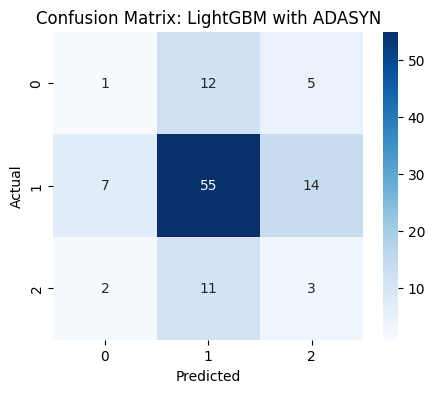

 97%|=================== | 319/330 [00:16<00:00]       

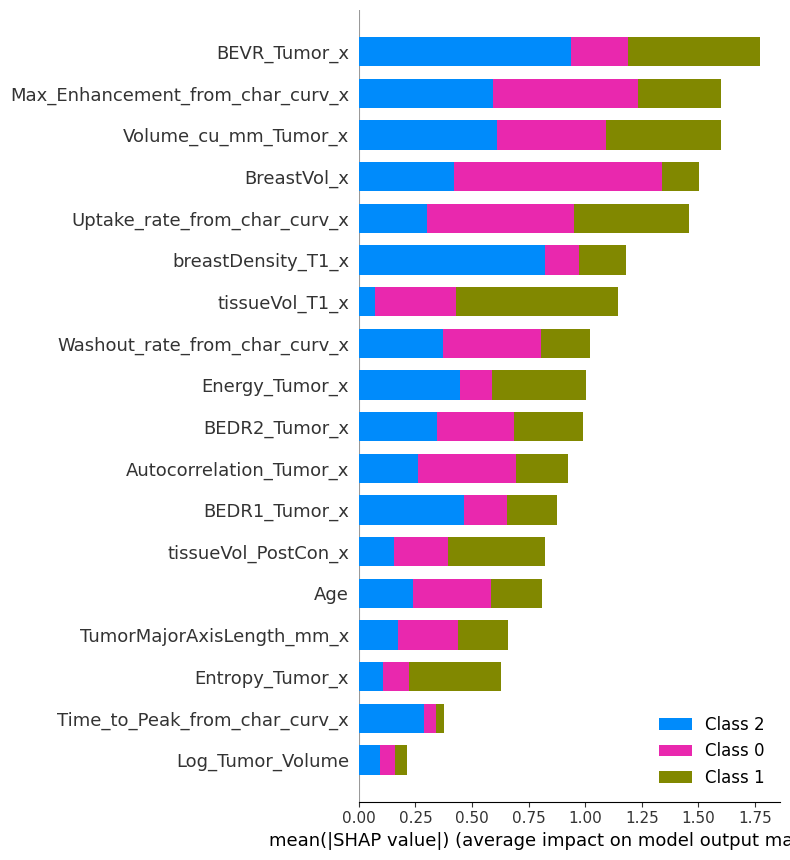

✅ Saved test predictions with aligned Patient_IDs for fairness evaluation.


In [ ]:
# # Advanced LightGBM pipeline with ADASYN for MRP with aligned Patient_ID
# # Author: Lakshita Mahajan

# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, StratifiedKFold
# from sklearn.preprocessing import QuantileTransformer
# from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
# from lightgbm import LGBMClassifier
# from imblearn.over_sampling import ADASYN
# import matplotlib.pyplot as plt
# import seaborn as sns
# import shap
# import warnings

# warnings.filterwarnings("ignore")  # Suppress sklearn and LightGBM warnings

# # 1️⃣ Load enriched cleaned data
# df = pd.read_csv("../data/processed/cleaned_clinical_enriched.csv")

# # Extract numeric Patient_ID for alignment with y_test
# df["Patient_ID_Num"] = df["Patient ID"].str.extract(r"(\d+)$").astype(int)

# # 2️⃣ Define features and target
# feature_columns = [
#     'Age', 'breastDensity_T1_x', 'tissueVol_T1_x', 'tissueVol_PostCon_x', 'BreastVol_x',
#     'TumorMajorAxisLength_mm_x', 'Volume_cu_mm_Tumor_x', 'Autocorrelation_Tumor_x',
#     'Entropy_Tumor_x', 'Energy_Tumor_x', 'BEVR_Tumor_x', 'BEDR1_Tumor_x', 'BEDR2_Tumor_x',
#     'Max_Enhancement_from_char_curv_x', 'Time_to_Peak_from_char_curv_x',
#     'Uptake_rate_from_char_curv_x', 'Washout_rate_from_char_curv_x', 'Log_Tumor_Volume'
# ]
# feature_columns = [col for col in feature_columns if col in df.columns]
# df = df.dropna(subset=feature_columns + ['Tumor_Response_Encoded'])

# X = df[feature_columns]
# y = df['Tumor_Response_Encoded']

# # 3️⃣ Quantile transform
# qt = QuantileTransformer(output_distribution='normal', n_quantiles=min(300, len(df)), random_state=42)
# X_transformed = qt.fit_transform(X)
# X_df = pd.DataFrame(X_transformed, columns=feature_columns)

# # 4️⃣ Train-test split WITH aligned Patient_ID
# X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split(
#     X_df, y, df["Patient_ID_Num"],
#     test_size=0.35, stratify=y, random_state=42
# )

# # 5️⃣ Apply ADASYN to address imbalance
# adasyn = ADASYN(random_state=42)
# X_train_bal, y_train_bal = adasyn.fit_resample(X_train, y_train)
# print(f"✅ After ADASYN: X_train shape: {X_train_bal.shape}, y_train distribution:\n{y_train_bal.value_counts()}")

# # 6️⃣ LightGBM model
# lgbm = LGBMClassifier(
#     n_estimators=800,
#     learning_rate=0.02,
#     max_depth=6,
#     num_leaves=31,
#     min_child_samples=10,
#     subsample=0.9,
#     colsample_bytree=0.9,
#     random_state=42,
#     verbosity=-1
# )

# # 7️⃣ Stratified K-Fold CV on ADASYN balanced data
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# cv_scores, cv_f1_scores = [], []

# for train_idx, val_idx in cv.split(X_train_bal, y_train_bal):
#     X_tr, X_val = X_train_bal.iloc[train_idx], X_train_bal.iloc[val_idx]
#     y_tr, y_val = y_train_bal.iloc[train_idx], y_train_bal.iloc[val_idx]
#     lgbm.fit(X_tr, y_tr)
#     preds = lgbm.predict(X_val)
#     cv_scores.append(accuracy_score(y_val, preds))
#     cv_f1_scores.append(f1_score(y_val, preds, average='macro'))

# print(f"\n✅ CV Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
# print(f"✅ CV Macro F1: {np.mean(cv_f1_scores):.4f} ± {np.std(cv_f1_scores):.4f}")

# # 8️⃣ Final training and test evaluation
# lgbm.fit(X_train_bal, y_train_bal)
# y_pred = lgbm.predict(X_test)

# print("\n✅ Test Results with ADASYN:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# print(f"Macro F1: {f1_score(y_test, y_pred, average='macro'):.4f}")
# print(classification_report(y_test, y_pred, digits=4))

# # 9️⃣ Confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(5, 4))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix: LightGBM with ADASYN')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# # 🔟 SHAP interpretability
# explainer = shap.Explainer(lgbm, X_train_bal)
# shap_values = explainer(X_test)
# shap.summary_plot(shap_values, X_test, feature_names=feature_columns)

# # ✅ Prepare for fairness analysis
# test_preds_df = pd.DataFrame({
#     "Patient_ID_Num": ids_test.reset_index(drop=True),
#     "True_Label": y_test.reset_index(drop=True),
#     "Pred_LGBM_Advanced": y_pred
# })

# # Save for your pre-fairness evaluation & MedFair ingestion
# test_preds_df.to_csv("../data/processed/test_predictions_medfair_ready.csv", index=False)
# print("✅ Saved test predictions with aligned Patient_IDs for fairness evaluation.")


✅ After ADASYN: X_train shape: (413, 18), y_train distribution:
Tumor_Response_Encoded
0    145
1    138
2    130
Name: count, dtype: int64

✅ CV Accuracy: 0.7724 ± 0.0386
✅ CV Macro F1: 0.7606 ± 0.0419

✅ Test Results with ADASYN + class_weight + threshold tuning:
Accuracy: 0.5455
Macro F1: 0.3718
              precision    recall  f1-score   support

           0     0.2857    0.2222    0.2500        18
           1     0.7260    0.6974    0.7114        76
           2     0.1304    0.1875    0.1538        16

    accuracy                         0.5455       110
   macro avg     0.3807    0.3690    0.3718       110
weighted avg     0.5673    0.5455    0.5548       110



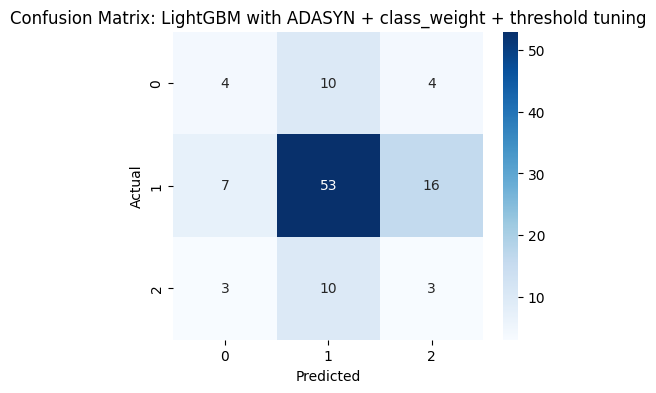

 95%|=================== | 312/330 [00:16<00:00]       

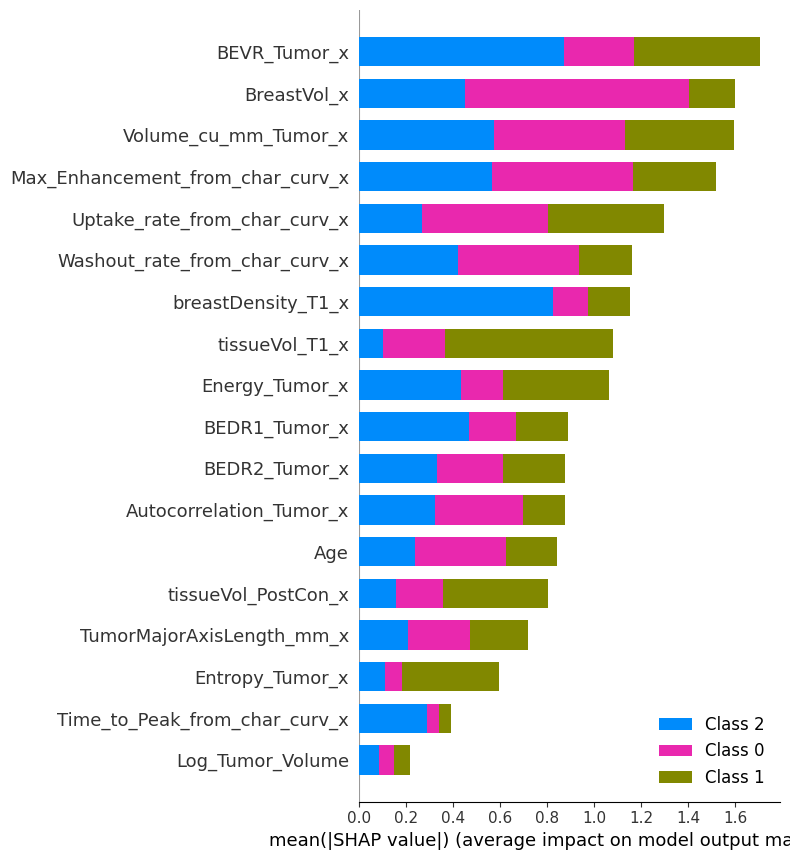

✅ Saved test predictions with aligned Patient_IDs for fairness evaluation and MedFair.


In [21]:
# Advanced LightGBM pipeline with ADASYN + class_weight balancing + threshold tuning
# Author: Lakshita Mahajan

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from lightgbm import LGBMClassifier
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import warnings

warnings.filterwarnings("ignore")

# 1️⃣ Load data
df = pd.read_csv("../data/processed/cleaned_clinical_enriched.csv")
df["Patient_ID_Num"] = df["Patient ID"].str.extract(r"(\d+)$").astype(int)

# 2️⃣ Define features and target
feature_columns = [
    'Age', 'breastDensity_T1_x', 'tissueVol_T1_x', 'tissueVol_PostCon_x', 'BreastVol_x',
    'TumorMajorAxisLength_mm_x', 'Volume_cu_mm_Tumor_x', 'Autocorrelation_Tumor_x',
    'Entropy_Tumor_x', 'Energy_Tumor_x', 'BEVR_Tumor_x', 'BEDR1_Tumor_x', 'BEDR2_Tumor_x',
    'Max_Enhancement_from_char_curv_x', 'Time_to_Peak_from_char_curv_x',
    'Uptake_rate_from_char_curv_x', 'Washout_rate_from_char_curv_x', 'Log_Tumor_Volume'
]
feature_columns = [col for col in feature_columns if col in df.columns]
df = df.dropna(subset=feature_columns + ['Tumor_Response_Encoded'])

X = df[feature_columns]
y = df['Tumor_Response_Encoded']

# 3️⃣ Quantile Transform
qt = QuantileTransformer(output_distribution='normal', n_quantiles=min(300, len(df)), random_state=42)
X_transformed = qt.fit_transform(X)
X_df = pd.DataFrame(X_transformed, columns=feature_columns)

# 4️⃣ Train-test split with aligned Patient_ID
X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split(
    X_df, y, df["Patient_ID_Num"],
    test_size=0.35, stratify=y, random_state=42
)

# 5️⃣ Apply ADASYN
adasyn = ADASYN(random_state=42)
X_train_bal, y_train_bal = adasyn.fit_resample(X_train, y_train)
print(f"✅ After ADASYN: X_train shape: {X_train_bal.shape}, y_train distribution:\n{y_train_bal.value_counts()}")

# 6️⃣ LightGBM with class_weight
lgbm = LGBMClassifier(
    n_estimators=800,
    learning_rate=0.02,
    max_depth=6,
    num_leaves=31,
    min_child_samples=10,
    subsample=0.9,
    colsample_bytree=0.9,
    class_weight='balanced',
    random_state=42,
    verbosity=-1
)

# 7️⃣ Stratified K-Fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores, cv_f1_scores = [], []

for train_idx, val_idx in cv.split(X_train_bal, y_train_bal):
    X_tr, X_val = X_train_bal.iloc[train_idx], X_train_bal.iloc[val_idx]
    y_tr, y_val = y_train_bal.iloc[train_idx], y_train_bal.iloc[val_idx]
    lgbm.fit(X_tr, y_tr)
    preds = lgbm.predict(X_val)
    cv_scores.append(accuracy_score(y_val, preds))
    cv_f1_scores.append(f1_score(y_val, preds, average='macro'))

print(f"\n✅ CV Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
print(f"✅ CV Macro F1: {np.mean(cv_f1_scores):.4f} ± {np.std(cv_f1_scores):.4f}")

# 8️⃣ Final training
lgbm.fit(X_train_bal, y_train_bal)

# 9️⃣ Threshold tuning for minority classes
y_probs = lgbm.predict_proba(X_test)
thresholds = [0.3, 0.4, 0.3]  # lower thresholds for classes 0 and 2
y_pred_custom = []

for prob in y_probs:
    if prob[0] > thresholds[0]:
        y_pred_custom.append(0)
    elif prob[2] > thresholds[2]:
        y_pred_custom.append(2)
    else:
        y_pred_custom.append(1)

y_pred_custom = np.array(y_pred_custom)

# 10️⃣ Evaluation
print("\n✅ Test Results with ADASYN + class_weight + threshold tuning:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_custom):.4f}")
print(f"Macro F1: {f1_score(y_test, y_pred_custom, average='macro'):.4f}")
print(classification_report(y_test, y_pred_custom, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_custom)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: LightGBM with ADASYN + class_weight + threshold tuning')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SHAP Interpretability
explainer = shap.Explainer(lgbm, X_train_bal)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names=feature_columns)

# Save for fairness analysis & MedFair
test_preds_df = pd.DataFrame({
    "Patient_ID_Num": ids_test.reset_index(drop=True),
    "True_Label": y_test.reset_index(drop=True),
    "Pred_LGBM_Advanced": y_pred_custom
})
test_preds_df.to_csv("../data/processed/test_predictions_medfair_ready.csv", index=False)
print("✅ Saved test predictions with aligned Patient_IDs for fairness evaluation and MedFair.")


In [18]:
# ⚡️ Systematic pre-MedFair fairness evaluation across all parameters for your MRP
# Author: Lakshita Mahajan

import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Load aligned test predictions
df_preds = pd.read_csv("../data/processed/test_predictions_medfair_ready.csv")

# 2️⃣ Load enriched clinical data with sensitive attributes
df_sensitive = pd.read_csv("../data/processed/cleaned_clinical_enriched.csv")

# Extract relevant sensitive columns
df_sensitive_clean = df_sensitive[[
    "Patient ID", "Unnamed: 2", "Unnamed: 3", "Unnamed: 5",
    "Unnamed: 20", "Unnamed: 21", "Age"
]].copy()
df_sensitive_clean.columns = [
    "Patient_ID", "Manufacturer", "Manufacturer_Model", "Field_Strength",
    "Menopausal_Status", "Race", "Age"
]

# Extract Patient_ID_Num for merging
df_sensitive_clean["Patient_ID_Num"] = df_sensitive_clean["Patient_ID"].str.extract(r"(\d+)$").astype(int)

# Compute Age_Group
df_sensitive_clean["Age_Years"] = df_sensitive_clean["Age"] * 10
df_sensitive_clean["Age_Group"] = pd.cut(
    df_sensitive_clean["Age_Years"],
    bins=[0, 49, 64, 150],
    labels=["Young", "Middle", "Older"]
)

# 3️⃣ Merge predictions with sensitive attributes
df_eval = df_preds.merge(df_sensitive_clean, on="Patient_ID_Num", how="left")

# Drop rows with missing sensitive attributes
df_eval_clean = df_eval.dropna(subset=[
    "Manufacturer", "Manufacturer_Model", "Field_Strength",
    "Menopausal_Status", "Race", "Age_Group"
])

# Ensure integer types for consistency
for col in ["Manufacturer", "Manufacturer_Model", "Field_Strength", "Menopausal_Status", "Race"]:
    df_eval_clean[col] = df_eval_clean[col].astype(int)

# 4️⃣ Function to compute subgroup metrics systematically
def compute_subgroup_metrics(df, group_col):
    metrics = []
    for group in sorted(df[group_col].dropna().unique()):
        subset = df[df[group_col] == group]
        y_true = subset["True_Label"]
        y_pred = subset["Pred_LGBM_Advanced"]

        acc = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='macro')
        try:
            roc = roc_auc_score(y_true, pd.get_dummies(y_pred), multi_class='ovo')
        except:
            roc = np.nan

        metrics.append({
            "Group": group,
            "N": len(subset),
            "Accuracy": acc,
            "F1_macro": f1,
            "ROC_AUC_OVO": roc
        })
    return pd.DataFrame(metrics)

# 5️⃣ Compute metrics for all subgroup dimensions
metrics_race = compute_subgroup_metrics(df_eval_clean, "Race")
metrics_menopause = compute_subgroup_metrics(df_eval_clean, "Menopausal_Status")
metrics_manufacturer = compute_subgroup_metrics(df_eval_clean, "Manufacturer")
metrics_model = compute_subgroup_metrics(df_eval_clean, "Manufacturer_Model")
metrics_field = compute_subgroup_metrics(df_eval_clean, "Field_Strength")
metrics_agegroup = compute_subgroup_metrics(df_eval_clean, "Age_Group")

# 6️⃣ Display clean outputs for your report and slides
print("\nFairness Evaluation Across Race")
print(metrics_race)

print("\nFairness Evaluation Across Menopausal Status")
print(metrics_menopause)

print("\nFairness Evaluation Across Manufacturer (Vendor)")
print(metrics_manufacturer)

print("\nFairness Evaluation Across Manufacturer Model")
print(metrics_model)

print("\nFairness Evaluation Across Field Strength")
print(metrics_field)

print("\nFairness Evaluation Across Age Group")
print(metrics_agegroup)

# 7️⃣ Optional: Save results for documentation
metrics_race.to_csv("../results/metrics_race.csv", index=False)
metrics_menopause.to_csv("../results/metrics_menopause.csv", index=False)
metrics_manufacturer.to_csv("../results/metrics_manufacturer.csv", index=False)
metrics_model.to_csv("../results/metrics_model.csv", index=False)
metrics_field.to_csv("../results/metrics_field.csv", index=False)
metrics_agegroup.to_csv("../results/metrics_agegroup.csv", index=False)

print("\nPre-fairness subgroup performance analysis completed and saved for MedFair.")



Fairness Evaluation Across Race
   Group   N  Accuracy  F1_macro  ROC_AUC_OVO
0      0   1  1.000000  1.000000          NaN
1      1  67  0.492537  0.308052     0.479167
2      2  36  0.611111  0.351648     0.560185
3      3   2  0.500000  0.333333          NaN
4      4   1  0.000000  0.000000          NaN
5      5   2  1.000000  1.000000          NaN
6      6   1  1.000000  1.000000          NaN

Fairness Evaluation Across Menopausal Status
   Group   N  Accuracy  F1_macro  ROC_AUC_OVO
0      0  59  0.508475  0.378028     0.539474
1      1  51  0.588235  0.376920     0.517544

Fairness Evaluation Across Manufacturer (Vendor)
   Group   N  Accuracy  F1_macro  ROC_AUC_OVO
0      0  67  0.552239  0.372125     0.521492
1      2  43  0.534884  0.367809     0.529557

Fairness Evaluation Across Manufacturer Model
   Group   N  Accuracy  F1_macro  ROC_AUC_OVO
0      0  26  0.576923  0.456099     0.625000
1      1   6  0.500000  0.333333          NaN
2      2   1  1.000000  1.000000          